In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

2023-10-01 23:19:38.706049: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 23:19:39.273376: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 23:19:39.610950: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 23:19:39.614249: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 23:19:42.093080: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df = df [['Date','Open','Close']] 
df ['Date'] = pd.to_datetime(df ['Date'].apply(lambda x: x.split()[0])) 
df.set_index('Date',drop=True,inplace=True) 
df.head()

,Open,Close
Date,,
2010-06-29,19.000000,23.889999
2010-06-30,25.790001,23.830000
2010-07-01,25.000000,21.959999
2010-07-02,23.000000,19.200001
2010-07-06,20.000000,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2010-06-29 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2394 non-null   float64
 1   Close   2394 non-null   float64
dtypes: float64(2)
memory usage: 56.1 KB


In [5]:

Ms = MinMaxScaler()
df [df .columns] = Ms.fit_transform(df )
training_size = round(len(df ) * 0.80)
train_data = df [:training_size]
test_data  = df [training_size:]

In [6]:
def create_sequence(dataset,window_size):
    sequences=[]
    labels=[]
    start_idx=0
    for stop_idx in range(window_size,len(dataset)):
      sequences.append (dataset.iloc[ start_idx:stop_idx])
      labels.append(dataset.iloc[stop_idx])
      start_idx += 1
    return (np.array(sequences),np.array(labels))  
   

In [7]:
window_size = 50
train_seq, train_label = create_sequence(train_data,window_size)
test_seq, test_label = create_sequence(test_data,window_size)


In [8]:

len(test_seq)

429

In [9]:
np.shape(train_seq)

(1865, 50, 2)

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

2023-10-01 23:19:47.065262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-01 23:19:47.073325: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2023-10-01 23:19:47.990317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-01 23:19:47.993520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-01 23:19:47.995659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


2023-10-01 23:19:48.464202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-01 23:19:48.467844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-01 23:19:48.470448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [11]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80


2023-10-01 23:19:49.449976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-01 23:19:49.454100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-01 23:19:49.457389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

59/59 [==============================] - ETA: 0s - loss: 0.0197 - mean_absolute_error: 0.0777

2023-10-01 23:20:05.920888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-01 23:20:05.926207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-01 23:20:05.929431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

59/59 [==============================] - 19s 127ms/step - loss: 0.0197 - mean_absolute_error: 0.0777 - val_loss: 0.0035 - val_mean_absolute_error: 0.0459
Epoch 2/80
59/59 [==============================] - 5s 84ms/step - loss: 0.0011 - mean_absolute_error: 0.0222 - val_loss: 0.0032 - val_mean_absolute_error: 0.0433
Epoch 3/80
59/59 [==============================] - 5s 88ms/step - loss: 9.3604e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0030 - val_mean_absolute_error: 0.0424
Epoch 4/80
59/59 [==============================] - 5s 80ms/step - loss: 9.6081e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0028 - val_mean_absolute_error: 0.0420
Epoch 5/80
59/59 [==============================] - 5s 84ms/step - loss: 8.9870e-04 - mean_absolute_error: 0.0204 - val_loss: 0.0030 - val_mean_absolute_error: 0.0417
Epoch 6/80
59/59 [==============================] - 5s 88ms/step - loss: 8.7886e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0026 - val_mean_absolute_error: 0.0393
Epoch 7/80
59/5

In [12]:
test_predicted = model.predict(test_seq)
test_inverse_predicted = Ms.inverse_transform(test_predicted)

2023-10-01 23:27:03.312539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-01 23:27:03.316089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-01 23:27:03.319091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-10-01 23:27:03.750678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-01 23:27:03.755171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-01 23:27:03.759084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 [==============================] - 2s 23ms/step


In [13]:
merged_data = pd.concat([df .iloc[-(len(test_predicted)):].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=df .iloc[-(len(test_predicted)):].index)], axis=1)

In [14]:
merged_data[['Open','Close']] = Ms.inverse_transform(merged_data[['Open','Close']])

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429 entries, 2018-04-19 to 2019-12-31
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             429 non-null    float64
 1   Close            429 non-null    float64
 2   Open_predicted   429 non-null    float32
 3   Close_predicted  429 non-null    float32
dtypes: float32(2), float64(2)
memory usage: 13.4 KB


In [16]:
merged_data[['Close','Close_predicted']].tail(5)

,Close,Close_predicted
Date,,
2019-12-24,425.250000,418.867523
2019-12-26,430.940002,422.390533
2019-12-27,430.380005,427.697083
2019-12-30,414.700012,427.022980
2019-12-31,418.329987,409.761292


In [17]:
print(sqrt(mean_squared_error(merged_data[['Close']],merged_data[['Close_predicted']])))

10.232763821086209


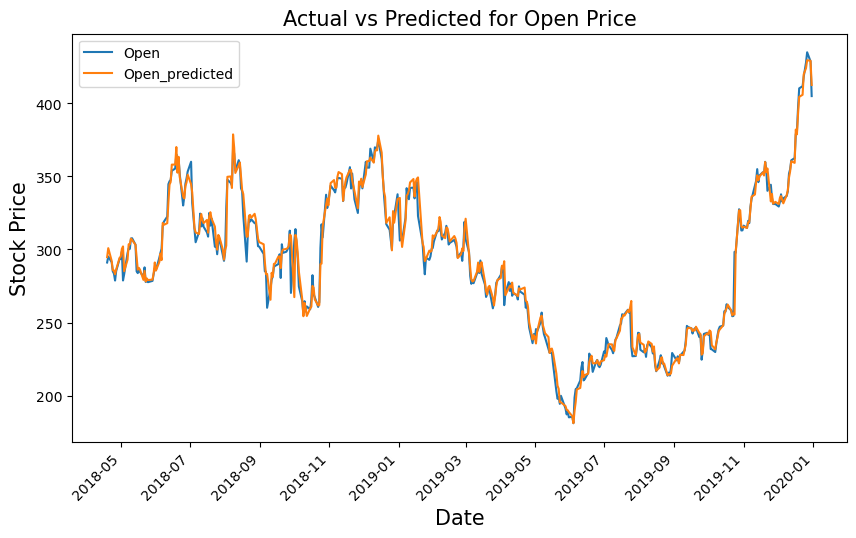

In [18]:
merged_data[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price',size=15)
plt.show()


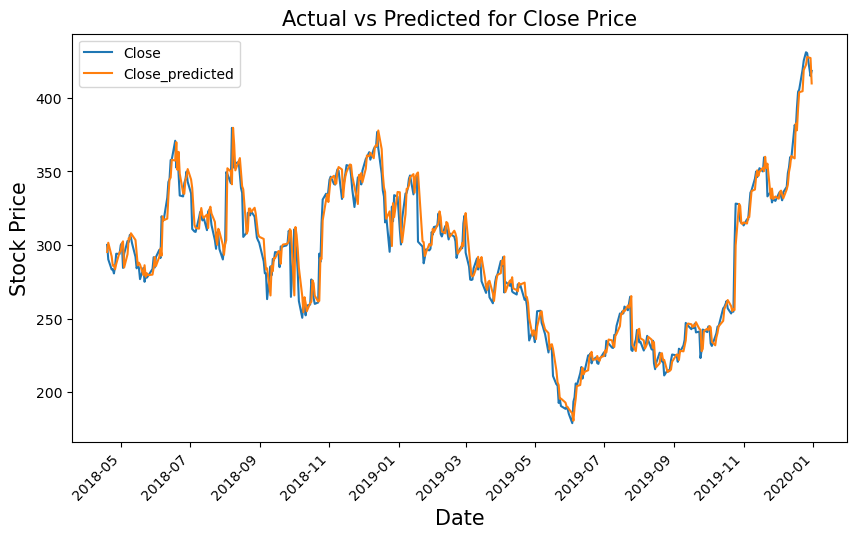

In [19]:
merged_data[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price',size=15)
plt.show()
